# Load data

In [2]:
import pandas as pd
import numpy as np

label2idx = {'무증상' : 0, '결막염' : 1, '궤양성각막질환' : 2 , '백내장' : 3 , '비궤양성각막질환' : 4,
               '색소침착성각막염' : 5, '안검내반증' : 6, '안검염' : 7, '안검종양' : 8, '유루증' : 9, '핵경화' : 10}
idx2label = {0: '무증상', 1: '결막염', 2: '궤양성각막질환', 3: '백내장', 4: '비궤양성각막질환',
               5: '색소침착성각막염', 6: '안검내반증', 7: '안검염', 8: '안검종양', 9: '유루증', 10: '핵경화'}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_결막염 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_u/결막염_images_224_200.pickle')
img_백내장 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_u/백내장_images_224_200.pickle')
img_유루증 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_u/유루증_images_224_200.pickle')
img_m_1 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_m/결막염_images_224_200.pickle')
img_m_2 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_m/백내장_images_224_200.pickle')
img_m_3 = pd.read_pickle('/content/drive/MyDrive/alpaco/team_project/pet/samples/t_m/유루증_images_224_200.pickle')
img_결막염.shape, img_백내장.shape, img_유루증.shape

((100, 224, 224, 3), (300, 224, 224, 3), (100, 224, 224, 3))

In [ ]:
img = np.concatenate((img_결막염, img_백내장, img_유루증, img_m_1, img_m_2, img_m_3))
img.shape

(800, 224, 224, 3)

In [ ]:
label = np.concatenate((np.full(100, 1), np.full(300, 3), np.full(100, 9), np.full(300, 0)))
label.shape

(800,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img, label, train_size= 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 224, 224, 3), (160, 224, 224, 3), (640,), (160,))

#  Load model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
model = deep_cnn()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 50)      1400      
                                                                 
 activation_6 (Activation)   (None, 224, 224, 50)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 50)      22550     
                                                                 
 activation_7 (Activation)   (None, 224, 224, 50)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 50)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 50)      22550     
                                                      

In [ ]:
%%time
es = tf.keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1, callbacks= es)

Epoch 1/10
11/11 [==============================] - 257s 23s/step - loss: 9.3034 - accuracy: 0.4355 - val_loss: 0.8713 - val_accuracy: 0.7109
Epoch 2/10
11/11 [==============================] - 243s 22s/step - loss: 0.8314 - accuracy: 0.6953 - val_loss: 0.5693 - val_accuracy: 0.7891
Epoch 3/10
11/11 [==============================] - 247s 23s/step - loss: 0.7016 - accuracy: 0.7441 - val_loss: 0.6942 - val_accuracy: 0.7500
Epoch 4/10
11/11 [==============================] - 242s 22s/step - loss: 0.5539 - accuracy: 0.8105 - val_loss: 0.7206 - val_accuracy: 0.7812
Epoch 5/10
11/11 [==============================] - 249s 23s/step - loss: 0.4018 - accuracy: 0.8496 - val_loss: 0.8212 - val_accuracy: 0.6953
CPU times: user 31min 41s, sys: 2min 9s, total: 33min 51s
Wall time: 20min 37s


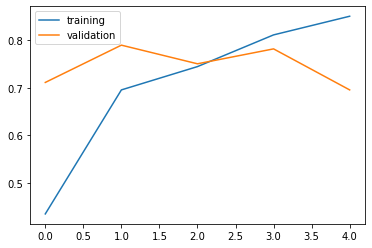

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

5/5 [==============================] - 18s 4s/step - loss: 0.6552 - accuracy: 0.7500
Test accuracy:  0.75


# Model inference

In [ ]:
def resize(img, img_size):
  if(img.shape[1] > img.shape[0]) : 
    ratio = img_size/img.shape[1]
  else :
    ratio = img_size/img.shape[0]

  img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR) # interpolation : 고간법 - 주변을 참고해서 채움

  return img

def padding(img, img_size):
  w, h = img.shape[1], img.shape[0]

  dw = (img_size-w)/2 # img_size와 w의 차이
  dh = (img_size-h)/2 # img_size와 h의 차이

  M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
  img_re = cv2.warpAffine(img, M, (img_size, img_size))

  return img_re

In [ ]:
import cv2

def check(path):
    IMG_SIZE = 224

    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

    img_re = resize(img, IMG_SIZE)
    img_pre = padding(img_re, IMG_SIZE)

    img_pre = np.array(img_pre)
    img_pre = img_pre.reshape(1, IMG_SIZE, IMG_SIZE, 3)
    output = model.predict(img_pre)
    max_idx = np.argmax(output)
    name = path.split('/')[-1]
    rate = output[0][max_idx]

    print(f'{name}을 살펴본 결과,')

    if max_idx:
        print(f'{idx2label[max_idx]}이(가) 의심됩니다.')
        print(f'rate: {rate}')
    else:
        print('정상입니다.')

In [ ]:
import os

In [ ]:
paths = os.listdir('/content/drive/MyDrive/alpaco/team_project/pet/samples')
print(paths)
for path in paths[4:]:
    
    full_path = '/content/drive/MyDrive/alpaco/team_project/pet/samples/' + path
    check(full_path)

['t_u', 't_m', 'v_u', 'v_m', '백내장_u.jpg', '백내장_m.png', '결막염_u.jpg', '유루증_u.jpg']
1/1 [==============================] - 0s 215ms/step
백내장_u.jpg을 살펴본 결과,
백내장이(가) 의심됩니다.
rate: 0.6473599672317505
1/1 [==============================] - 0s 208ms/step
백내장_m.png을 살펴본 결과,
정상입니다.
1/1 [==============================] - 0s 120ms/step
결막염_u.jpg을 살펴본 결과,
백내장이(가) 의심됩니다.
rate: 0.694605827331543
1/1 [==============================] - 0s 121ms/step
유루증_u.jpg을 살펴본 결과,
정상입니다.
